# HOMEWORK: DESIGN OF A FODO CELL FOR AN ELECTRON CIRCULAR ACCELERATOR 

1. We want to design a circular accelerator for electrons with P=4 GeV/c composed by FODO cells according to the following conditions:

- The lenght of the qudrupoles is 1 m.


- The lenght of the dipoles is 5 m.


- The FODO phase advance is 90° and the cell lenght is 70 m. With the help of the thin lens approximation parametric plots from Tutorial 1 set the strength of the quadrupoles (K). 


- Check that the stability condition for the FODO is satisfied with the selected parameters.


- Consider 4 dipoles per FODO cell.
    
    
- The space of the ring available for the FODO cell is 70% of the total circunference. The total circunference is 1000 m. This information together with the length of the FODO cell allows you to fix the number of FODO cells that fits into your ring and hence the required angle of the bending magnets. 


- Check that the magnet strengths computed are okay with the condition that we have only normal conducting magnets at our disposal with the following characteristics:
     - For dipole magnets: Bmax ≤ 2 T and $l_d$ = 5 m.
     - For quadrupole magnets: dBy/dx|max ≤ 25 T/m & and $l_q$=1 m. 
     
Define the FODO according to the above boundary conditions, and find the optics using MAD-X. Plot the beta-functions and the dispersion.     
    
**USEFUL formulas**:
    
   - FODO stbility condition: $f>L_{cell}/4$.
    
    
   - Normalized focusing strength: $k [m^{-2}]\approx 0.3 G[T/m]/P[GeV/c]/q[e]$.
    
    
   - Normalized bending strength: $1/\rho[m] \approx 0.3 B[T]/P[GeV/c]/q[e]$.

2. What is the $\beta_{x,max}$ and $\beta_{y,max}$ computed by MAD-X? What is happening on the horizontal plane? Why? Compute the relative variation of the beta-functions with and without the effect of the dipoles? 


3. If instead of P=4 GeV/c electrons we want to store P=25 GeV/c electrons, would still your design satisfy the condition required for normal-conducting magnets? What will you need to change in the design to keep using normal conducting magnets? 


4. Match both, horizontal and vertical tunes to 0.25. You may need to set different strengths for each quadrupole, why?
           
           
5. Compute the horizontal and vertical beam sizes considering a normalized emittance value of 4.58 nm rad.

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from cpymad.madx import Madx 

In [5]:
#From parametric plots
2.849/1/70

0.0407

In [6]:
#We can check that the stability condition is satisfied for the chosen lq= 1m
print(1/0.04)
print(70/4)

25.0
17.5


In [7]:
#We need to check that the required strength is available by the magnets at our disposal
# k=0.3*G[T/m]/P[GeV/c]*c*q[e]
0.04*4/0.3

0.5333333333333333

In [8]:
#Now we need to determine the parameters for the dipoles.
#Assuming that the Lcell=70 m and that the FODO cells occupy 70% of the ring we compute the Ncells
(0.7*1000)/70

10.0

In [9]:
#The number of dipoles are
10*4

40

In [10]:
#Now we can compute the angle 2*pi=Ndipoles*theta
2*np.pi/40

0.15707963267948966

In [11]:
#We can compute now rho for a given value of the dipole lenght
5/0.15707963267948966

31.830988618379067

In [12]:
#We need to check that the B field required is available
#1/rho=0.3*B[T]/P[GeV/c]*c*q[e]
4/(0.3*31.830988618379067)

0.4188790204786391

In [26]:
myMad = Madx()
myString='''

! *********************************************************************
! Definition of parameters
! *********************************************************************

quadrupoleLength=1;
dipoleLength=5;
cellLength=70;

myK=0.040;
myAngle=0.157;

! *********************************************************************
! Definition of magnets
! ********************************************************************* 

QF: quadrupole, L=quadrupoleLength, K1:=myK;
QD: quadrupole, L=quadrupoleLength, K1:=-myK;
BM: sbend, L=dipoleLength, angle:=myAngle; 

! *********************************************************************
! Definition of sequence
! *********************************************************************

myCell:sequence, refer=entry, L=cellLength;
q1: QF, at=0;
B1: BM, at =5+quadrupoleLength/2, from=q1;
B2: BM, at =5+dipoleLength/2, from=B1;
q2: QD, at=cellLength/2;
B3: BM, at =5+quadrupoleLength/2, from=q2;
B4: BM, at =5+dipoleLength/2, from=B3;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=electron, energy=4;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************
twiss, table=first_twiss, file=/Users/nuria/Desktop/JUAS2022/exercice.txt;
plot, table=first_twiss, haxis=s, vaxis=betx,bety ,colour=100, file=/Users/nuria/Desktop/JUAS2022/exercice;

value, myK;

'''
myMad.input(myString);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2022.01.14 10:52:07      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
                70                 -0       0.1133597226         2.97009686 

                q1                dq1            betxmax              dxmax 
      0.3240223299       -0.289471348        105.9701387        18.28374054 

             dxrms             xcomax             xcorms                 q2 
       14.17475864                  0                  0       0.2438418116 

               dq2            betymax              dymax 

In [15]:
first_df=myMad.table['first_twiss'].dframe()
first_df[["name", "keyword","s","betx","bety","alfx","alfy","dx","dpx","dy","dpy"]]

,name,keyword,s,betx,bety,alfx,alfy,dx,dpx,dy,dpy
#s,mycell$start:1,marker,0.0,105.685576,21.784027,-2.259230,0.457352,18.283740,0.348956,0.0,-0.0
q1,q1:1,quadrupole,1.0,105.970139,21.784027,1.978472,-0.457352,18.265918,-0.384483,0.0,0.0
drift_0[0],drift_0:0,drift,6.0,87.344790,27.745231,1.746598,-0.734889,16.343501,-0.384483,0.0,0.0
b1,b1:1,sbend,11.0,69.178961,36.481797,1.856668,-1.012425,14.619655,-0.303638,0.0,0.0
drift_1[0],drift_1:0,drift,16.0,52.219426,47.993725,1.535239,-1.289961,13.101463,-0.303638,0.0,0.0
b2,b2:1,sbend,21.0,37.435437,62.281015,1.397224,-1.567497,11.820058,-0.207871,0.0,0.0
drift_2[0],drift_2:0,drift,35.0,13.770118,117.050351,0.293155,-2.344598,8.909871,-0.207871,0.0,0.0
q2,q2:1,quadrupole,36.0,13.806154,117.050351,-0.329671,2.344598,8.879404,0.146734,0.0,0.0
drift_3[0],drift_3:0,drift,41.0,19.110447,94.992048,-0.731188,2.067062,9.613072,0.146734,0.0,0.0
b3,b3:1,sbend,46.0,27.826717,75.709107,-0.997719,1.789526,10.617192,0.254089,0.0,0.0


<IPython.core.display.Javascript object>


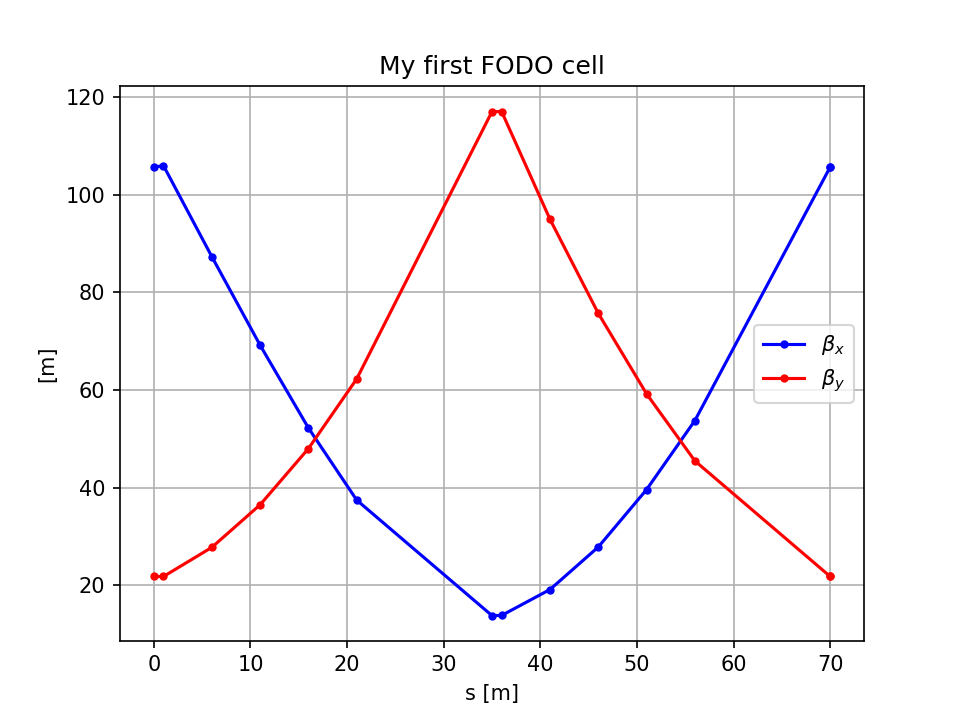

Text(0.5, 1.0, 'My first FODO cell')

In [16]:
%matplotlib notebook
# Plot
plt.plot(first_df['s'],first_df['betx'],'.-b',label='$\\beta_x$')
plt.plot(first_df['s'],first_df['bety'],'.-r',label='$\\beta_y$')
plt.legend()
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.title('My first FODO cell')

2. What is the $\beta_{x,max}$ and $\beta_{y,max}$ computed by MAD-X? What is happening on the horizontal plane? Why? Compute the relative variation of the beta-functions with and without the effect of the dipoles?

In [17]:
myString='''
myAngle=2*pi*0;
twiss, table=second_twiss;
'''
myMad.input(myString);

++++++ info: myangle redefined
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
                70                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.2438418116       -0.306220463        117.0503512                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.2438418116 

               dq2            betymax              dymax              dyrms 
      -0.306220463        117.0503512                 -0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 


In [18]:
#Saving the content of the TWISS and SUMM table in two panda dataframes names as second_twiss and second_summary
second_twiss=myMad.table['second_twiss'].dframe()
second_summary=myMad.table['summ'].dframe()

In [19]:
second_twiss[['name', 'keyword', 's', 
          'x','y','px','py',
          'betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
          ]]

,name,keyword,s,x,y,px,py,betx,alfx,mux,bety,alfy,muy,dx,dy,dpx,dpy
#s,mycell$start:1,marker,0.0,0.0,0.0,0.0,0.0,117.050351,-2.344598,0.000000,21.784027,0.457352,0.000000,0.0,-0.0,-0.0,-0.0
q1,q1:1,quadrupole,1.0,0.0,0.0,0.0,0.0,117.050351,2.344598,0.001351,21.784027,-0.457352,0.007357,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,6.0,0.0,0.0,0.0,0.0,94.992048,2.067062,0.008900,27.745231,-0.734889,0.039954,0.0,0.0,0.0,0.0
b1,b1:1,sbend,11.0,0.0,0.0,0.0,0.0,75.709107,1.789526,0.018289,36.481797,-1.012425,0.065070,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,16.0,0.0,0.0,0.0,0.0,59.201528,1.511990,0.030187,47.993725,-1.289961,0.084134,0.0,0.0,0.0,0.0
b2,b2:1,sbend,21.0,0.0,0.0,0.0,0.0,45.469310,1.234454,0.045549,62.281015,-1.567497,0.098709,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,35.0,0.0,0.0,0.0,0.0,21.784027,0.457352,0.118918,117.050351,-2.344598,0.124924,0.0,0.0,0.0,0.0
q2,q2:1,quadrupole,36.0,0.0,0.0,0.0,0.0,21.784027,-0.457352,0.126275,117.050351,2.344598,0.126275,0.0,0.0,0.0,0.0
drift_3[0],drift_3:0,drift,41.0,0.0,0.0,0.0,0.0,27.745231,-0.734889,0.158871,94.992048,2.067062,0.133825,0.0,0.0,0.0,0.0
b3,b3:1,sbend,46.0,0.0,0.0,0.0,0.0,36.481797,-1.012425,0.183988,75.709107,1.789526,0.143214,0.0,0.0,0.0,0.0


In [20]:
aux=pd.DataFrame({'With dipoles':first_df.max(),'Without dipoles':second_twiss.max()})
aux.loc[['betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
        ]]

,With dipoles,Without dipoles
betx,105.970139,117.050351
alfx,1.978472,2.344598
mux,0.324022,0.243842
bety,117.050351,117.050351
alfy,2.344598,2.344598
muy,0.243842,0.243842
dx,18.28374,0.0
dy,0.0,0.0
dpx,0.348956,0.0
dpy,0.0,0.0


In [21]:
#Relative variation
betx_rel=(np.max(second_twiss.betx)-np.max(first_df.betx))/np.max(second_twiss.betx)
print(betx_rel)

bety_rel=(np.max(second_twiss.bety)-np.max(first_df.bety))/np.max(second_twiss.bety)
print(bety_rel)

0.0946619328805468
0.0


3. If instead of 4 GeV/c electrons we want to store 25 GeV/c electrons would still your design satisfy the condition required for normal-conducting magnets? What will you need to change in the design to keep using normal conducting magnets? 

The condition is not satisfied anymore and the B field needed is higherv than 2 T. One option will be to increase the circunference of the ring and introduce more FODO cells and hence more dipoles.

4. Match both, horizontal and vertical tunes to 0.25. You may need to set different strengths for each quadrupole.

In [22]:
myMad = Madx()
myString='''

! *********************************************************************
! Definition of parameters
! *********************************************************************

quadrupoleLength=1;
dipoleLength=5;
cellLength=70;


myKF=0.04;
myKD=-0.04;
myAngle=0.157;

! *********************************************************************
! Definition of magnets
! ********************************************************************* 

QF: quadrupole, L=quadrupoleLength, K1:=myKF;
QD: quadrupole, L=quadrupoleLength, K1:=myKD;
BM: sbend, L=dipoleLength, angle:=myAngle; 

! *********************************************************************
! Definition of sequence
! *********************************************************************

myCell:sequence, refer=entry, L:=cellLength;
q1: QF, at=0;
B1: BM, at =5+quadrupoleLength/2, from=q1;
B2: BM, at =5+dipoleLength/2, from=B1;
q2: QD, at=cellLength/2;
B3: BM, at =5+quadrupoleLength/2, from=q2;
B4: BM, at =5+dipoleLength/2, from=B3;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=electron, energy=4;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS BEFORE MATCHING
! *********************************************************************

twiss, table=beforematching, file="/Users/nuria/Desktop/JUAS2022/BeforeMatching.txt";

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! MATCHING
! *********************************************************************

MATCH, SEQUENCE=myCell;
GLOBAL, Q1=0.25;
GLOBAL, Q2=0.25;
VARY, NAME= myKF, STEP=0.00001;
VARY, NAME= myKD, STEP=0.00001;
LMDIF, CALLS=2000, TOLERANCE=1e-12;//method adopted
ENDMATCH;

twiss, table=afterematching, file="/Users/nuria/Desktop/JUAS2022/AfterMatching.txt";
plot, table=afterematching, haxis=s, vaxis=betx,bety,dx,colour=100, title="AfterMatching", file="/Users/nuria/Desktop/JUAS2022/AfterMatching";

value, mykf;
value, mykd;

'''
myMad.input(myString);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2022.01.14 10:46:07      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
                70                 -0       0.1133597226         2.97009686 

                q1                dq1            betxmax              dxmax 
      0.3240223299       -0.289471348        105.9701387        18.28374054 

             dxrms             xcomax             xcorms                 q2 
       14.17475864                  0                  0       0.2438418116 

               dq2            betymax              dymax 

5. Compute the horizontal and vertical beam sizes considering a normalized emittance value of 4.58 nm rad.

In [ ]:
#On the horizontal plane we see the impact on the betax function from the dipoles

In [23]:
#Computation of the gamma
4/0.938

4.264392324093817

In [24]:
#Computation of the beam size
np.sqrt(4.58e-9/4.26*120)

0.00035918530664135227

In [25]:
#~360 um